# Getting started with WYM

Note: you can run **[this notebook live in Google Colab](https://colab.research.google.com/github/softlab-unimore/WYM/blob/master/quick_start_wym.ipynb)** and use free GPUs provided by Google.

This tutorial describes how to effortlessly explaining entity matching. Specifically, we will see how to match pairs of tuples (also called data records or table rows) to determine if they refer to the same real world entity. To do so, we will need labeled examples as input, i.e., tuple pairs which have been annotated as matches or non-matches. This will be used to train a model to explain using supervised learning.

## Step 0. Setup

If you are running this notebook inside Colab, you will first need to install necessary packages by running the code below:

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 14eQiG9sYM4LcCfJbwnoUgxZ0-PfpsWkQ -O ABT-BUY-data.zip
!unzip ABT-BUY-data.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14eQiG9sYM4LcCfJbwnoUgxZ0-PfpsWkQ
To: /content/ABT-BUY-data.zip
100% 39.6M/39.6M [00:01<00:00, 27.9MB/s]
Archive:  ABT-BUY-data.zip
   creating: Abt-Buy/
  inflating: Abt-Buy/train_simplified.csv  
  inflating: Abt-Buy/test_simplified.csv  
   creating: Abt-Buy/.ipynb_checkpoints/
  inflating: Abt-Buy/train_merged.csv  
  inflating: Abt-Buy/valid_simplified.csv  
  inflating: Abt-Buy/valid_merged.csv  
  inflating: Abt-Buy/test_merged.csv  
  inflating: Abt-Buy/best_model.pth  
  i

## Clone WYM

In [2]:
!git clone https://github.com/softlab-unimore/wym.git

Cloning into 'wym'...
remote: Enumerating objects: 334, done.
remote: Counting objects: 100% (334/334), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 334 (delta 227), reused 212 (delta 108), pack-reused 0
Receiving objects: 100% (334/334), 2.88 MiB | 14.33 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [3]:
!pip install -e wym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/wym
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.2 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformer

### Load data for entity matching

Now let's get some sample data to play with in this tutorial.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
# dataset_path = '/content/Abt-Buy/'
dataset_path = 'Abt-Buy/'

simplified_columns = ['id','left_id','right_id','label','left_name','right_name']
train_df = pd.read_csv(dataset_path + 'train_merged.csv')[simplified_columns].iloc[:].copy()
valid_df = pd.read_csv(dataset_path + 'valid_merged.csv')[simplified_columns].iloc[:500].copy()
test_df = pd.read_csv(dataset_path + 'test_merged.csv')[simplified_columns].iloc[:500].copy()

# train_df.to_csv(dataset_path + 'train_simplified.csv', index=False)
# valid_df.to_csv(dataset_path + 'valid_simplified.csv', index=False)
# test_df.to_csv(dataset_path + 'test_simplified.csv', index=False)

exclude_attrs=['id','left_id','right_id', 'label']

In [3]:
train_df

,id,left_id,right_id,label,left_name,right_name
0,0,730,775,0,lg 24 ' lds4821ww semi integrated built in whi...,lg ldf6920bb fully integrated dishwasher
1,1,731,775,0,lg 24 ' lds4821bb semi integrated built in bla...,lg ldf6920bb fully integrated dishwasher
2,2,735,775,1,lg 24 ' ldf6920bb fully integrated built in bl...,lg ldf6920bb fully integrated dishwasher
3,3,732,775,0,lg 24 ' ldf6920ww fully integrated built in wh...,lg ldf6920bb fully integrated dishwasher
4,4,734,775,0,lg 24 ' ldf6920st fully integrated built in st...,lg ldf6920bb fully integrated dishwasher
...,...,...,...,...,...,...
5738,5738,429,226,1,electrolux harmony series canister vacuum el6985b,"harmony el6985a vacuum ( canister , hepa )"
5739,5739,1072,623,1,lasonic atsc digital to analog tv converter bo...,lasonic lta-260 atsc converter box
5740,5740,149,270,1,waring professional cool-touch deep fryer blac...,waring pro deep fryer 3qt - black
5741,5741,518,404,1,bracketron ipod docking kit ipm202bl,bracketron ipod docking kit


# WYM


In [4]:
from wym.wym import Wym

In [5]:
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

## Initialize WYM
Using pre-trained `bert-base-uncased` as default

In [6]:
wym = Wym(df=train_df, exclude_attrs=exclude_attrs, batch_size=512, reset_networks=True)

X, y = train_df[wym.columns_to_use], train_df['label']
X_valid, y_valid = valid_df[wym.columns_to_use], valid_df['label']
X_test, y_test = test_df[wym.columns_to_use], test_df['label']

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Fit
X_valid, y_valid are optional, if None they are copied from X, y

In [7]:
wym.fit(X, y, X_valid, y_valid)

Computing embedding


  0%|          | 0/12 [00:00<?, ?it/s]

Computing embedding


  0%|          | 0/12 [00:00<?, ?it/s]

generating word_pairs


  0%|          | 0/5743 [00:00<?, ?it/s]

Computing embedding


  0%|          | 0/1 [00:00<?, ?it/s]

Computing embedding


  0%|          | 0/1 [00:00<?, ?it/s]

generating word_pairs


/content/wym/wym/WordPairGenerator.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = df.index


  0%|          | 0/500 [00:00<?, ?it/s]

resetting networks


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch   1/40: train Loss: 0.5227 MSELoss(): 0.0479 std: 0.2291	|	valid Loss: 0.3831 MSELoss(): 0.0090 std: 0.2177
Epoch   2/40: train Loss: 0.4361 MSELoss(): 0.0148 std: 0.2327	|	valid Loss: 0.3652 MSELoss(): 0.0053 std: 0.2269
Epoch   3/40: train Loss: 0.4289 MSELoss(): 0.0123 std: 0.2313	|	valid Loss: 0.3645 MSELoss(): 0.0052 std: 0.2344
Epoch   4/40: train Loss: 0.4257 MSELoss(): 0.0113 std: 0.2430	|	valid Loss: 0.3600 MSELoss(): 0.0046 std: 0.2292
Epoch   5/40: train Loss: 0.4227 MSELoss(): 0.0106 std: 0.2401	|	valid Loss: 0.3590 MSELoss(): 0.0046 std: 0.2376
Epoch   6/40: train Loss: 0.4211 MSELoss(): 0.0102 std: 0.2333	|	valid Loss: 0.3580 MSELoss(): 0.0044 std: 0.2343
Epoch   7/40: train Loss: 0.4192 MSELoss(): 0.0098 std: 0.2410	|	valid Loss: 0.3550 MSELoss(): 0.0041 std: 0.2513
Epoch   8/40: train Loss: 0.4179 MSELoss(): 0.0095 std: 0.2522	|	valid Loss: 0.3531 MSELoss(): 0.0038 std: 0.2568
Epoch   9/40: train Loss: 0.4165 MSELoss(): 0.0092 std: 0.2374	|	valid Loss: 0.3545 MSEL

  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:402: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:402: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REA

before feature selection


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Predict

In [8]:
wym.predict(X_test)

Computing embedding


  0%|          | 0/1 [00:00<?, ?it/s]

Computing embedding


  0%|          | 0/1 [00:00<?, ?it/s]

generating word_pairs


/content/wym/wym/WordPairGenerator.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = df.index


  0%|          | 0/500 [00:00<?, ?it/s]

array([5.33784258e-03, 1.03626349e-06, 3.58364130e-03, 3.73775993e-03,
       2.34586583e-01, 9.00245529e-04, 3.03023904e-02, 9.16489035e-02,
       9.26136411e-02, 7.31124144e-02, 8.51818144e-03, 9.32200768e-04,
       6.49844723e-02, 6.64232544e-03, 6.49344069e-01, 2.15414234e-01,
       2.03048370e-03, 5.08187691e-03, 7.70078017e-03, 8.01201275e-03,
       3.06296577e-03, 5.20978851e-03, 1.99866210e-02, 1.01679187e-01,
       1.93978661e-03, 4.81541793e-03, 2.92553803e-04, 1.35245643e-04,
       1.83328057e-04, 4.32676714e-02, 3.73839124e-04, 1.81283704e-02,
       6.48347943e-02, 4.29955357e-02, 2.36815875e-02, 7.42078539e-03,
       5.82737680e-03, 5.42363829e-03, 6.48585636e-03, 5.16613897e-02,
       4.00529482e-03, 1.65915932e-02, 4.29181800e-03, 6.50672848e-02,
       5.92738643e-04, 2.02349647e-02, 3.49542436e-02, 2.92674579e-02,
       4.67626591e-02, 6.89478667e-04, 5.90067838e-04, 5.58815260e-03,
       9.18932304e-03, 1.79766954e-02, 1.62745537e-02, 1.16858934e-04,
      

In [9]:
match_score, data_dict, word_pairs, emb_pairs, features, word_relevance = wym.predict(X_test, return_data=True)

Computing embedding


  0%|          | 0/1 [00:00<?, ?it/s]

Computing embedding


  0%|          | 0/1 [00:00<?, ?it/s]

generating word_pairs


  0%|          | 0/500 [00:00<?, ?it/s]

### Explain

In [10]:
pd.Series(match_score).describe()

count    5.000000e+02
mean     3.414664e-02
std      1.053498e-01
min      3.784322e-07
25%      2.610538e-04
50%      3.365103e-03
75%      1.614149e-02
max      8.044894e-01
dtype: float64

#### Positive element

In [11]:
positive = match_score > .5

In [16]:
id = test_df[positive]['id'].values[2]
test_df[positive]

,id,left_id,right_id,label,left_name,right_name
14,14,269,348,0,panasonic countertop microwave oven in white n...,panasonic nnsn667b 1.2 cu . ft. countertop mic...
144,144,797,259,1,canon battery charger 1133b001,canon cb-2lx battery charger 1133b001
199,199,161,237,1,sirius sportster 4 with car kit sp4tk1,directed electronics sportster 4 sirius satell...
283,283,650,666,0,samsung 40 ' series 7 lcd black flat panel hdt...,samsung ln40a650 40 ' lcd tv
284,284,568,666,1,samsung 40 ' series 6 lcd black flat panel hdt...,samsung ln40a650 40 ' lcd tv
287,287,695,744,1,samsung 67 ' black widescreen series 7 led dlp...,samsung hl-67a750 67 ' widescreen 1080p dlp hd...
340,340,944,954,1,toshiba 42 ' regza theaterwide black flat pane...,toshiba 42rv535u 42 ' widescreen 1080p lcd hdt...
391,391,599,545,1,belkin neoprene sleeve for macbook air f8n065blk,belkin neoprene sleeve for macbook air neopren...
418,418,617,697,1,samsung 32 ' series 5 lcd black flat panel hdt...,samsung ln32a550 32 ' lcd tv


match score : 0.7084


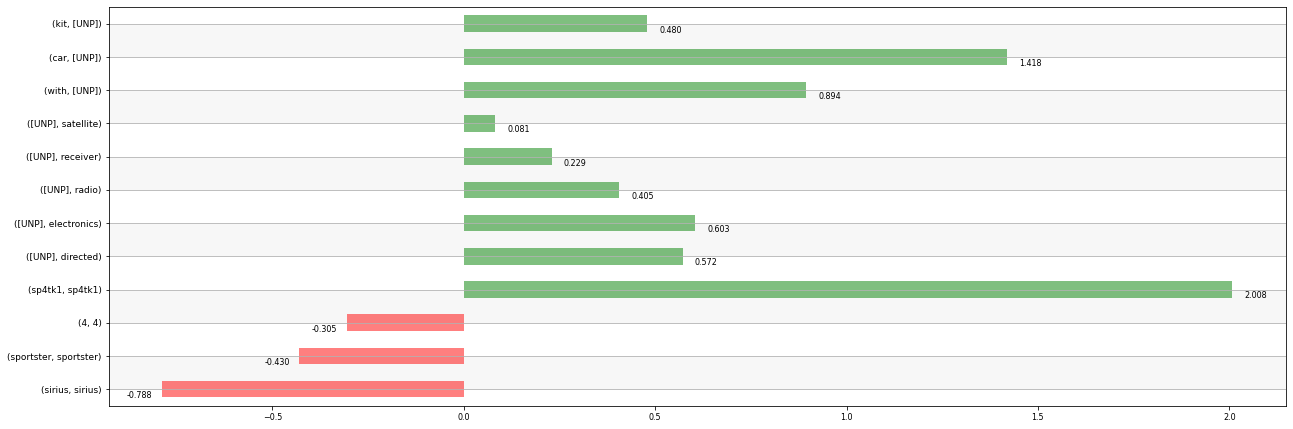

,id,left_id,right_id,label,left_name,right_name
199,199,161,237,1,sirius sportster 4 with car kit sp4tk1,directed electronics sportster 4 sirius satell...


In [17]:
el_exp = word_relevance.query(f'id == {id}')
print(f'match score : {match_score[id]:.4f}')
wym.plot_token_contribution(el_exp, cut=0)
test_df.query(f'id == {id}')

#### Negative element

In [18]:
id = 0

match score : 0.0053


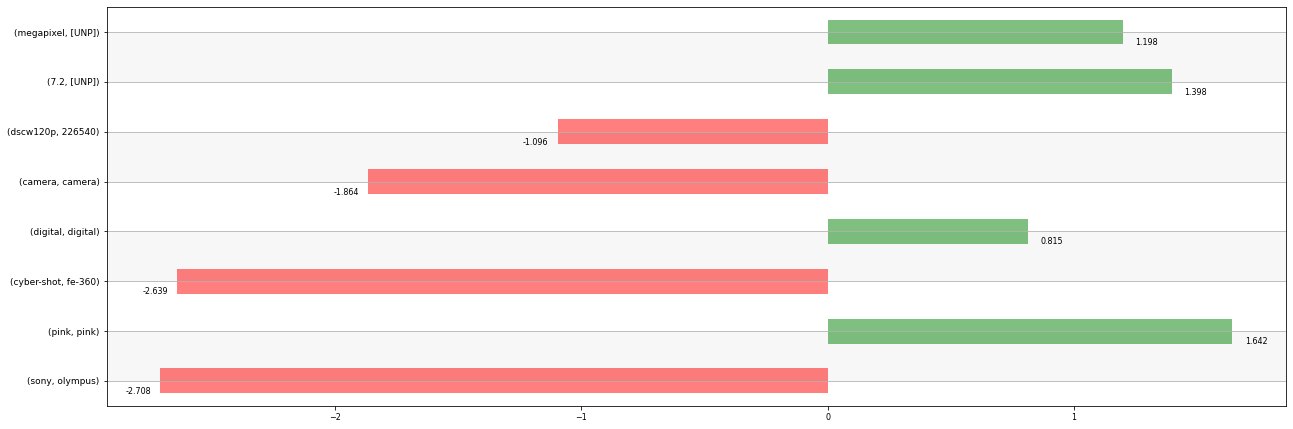

,id,left_id,right_id,label,left_name,right_name
0,0,445,910,0,sony pink cyber-shot 7.2 megapixel digital cam...,olympus fe-360 digital camera pink 226540


In [19]:
el_exp = word_relevance.query(f'id == {id}')
print(f'match score : {match_score[id]:.4f}')
wym.plot_token_contribution(el_exp, cut=0)
test_df.query(f'id == {id}')